### Load lib

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit

from data import datasets_location

plot_size = (12, 8)

### Helper Functions

In [2]:
def fix_date(df):
    df['time'] = df['time'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

###  Read the data file

In [3]:
data = []
data_mts = []
data_mtts = []

for i in range(0, 3):
    data.append(pd.read_csv(datasets_location[i] + "_1.csv"))
    
    data_mts.append(np.array(data[i]["transfer_history.mean_transfer_size"]))
    data_mts[i] = data_mts[i][data_mts[i] != 0.0]
    
    data_mtts.append(np.array(data[i]["transfer_history.mean_time_transfer_sec"]))
    data_mtts[i] = data_mtts[i][data_mtts[i] > 0.0]

In [4]:
def plot_hist(cut, temp, bins, name):
    
    plt.figure(figsize=plot_size)
    plt.hist(temp, bins=bins)
    plt.axvline((10.0 ** cut), color='k', linestyle='dashed')
    plt.grid(True)
    plt.xlabel(name)
    plt.ylabel('Historgram')
    plt.show()
    
    print("Points above the dotted line : " + str(sum(temp > (10.0 ** cut))))
    print("Total points in the dataset : " + str(len(temp)))

    temp = np.log10(temp)
    
    bin_heights, bin_borders = np.histogram(temp, bins='auto')
    bin_widths = np.diff(bin_borders)
    bin_centers = bin_borders[:-1] + bin_widths / 2
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
    
    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

    plt.figure(figsize=plot_size)
    plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', c='red')
    plt.hist(temp, bins = np.arange(0, 20, 0.4))
    plt.axvline(cut, color='k', linestyle='dashed')
    plt.axvline(popt[0] + popt[2]*3, color='c', linestyle='dashed')
    plt.axvline(popt[0] - popt[2]*3, color='c', linestyle='dashed')
    plt.grid(True)
    plt.xlabel('Log of ' + name)
    plt.ylabel('Historgram')
    plt.show()

    print("Points above the dotted line : " + str(sum(temp > cut)))
    print("Total points in the dataset : " + str(len(temp)))
    print(popt)

    # plt.hist(temp, bins=np.arange(6000000000, 19000000000, 500000000))
    # plt.axis([6000000000, 19000000000, 0, 20])
    # plt.hist(temp, bins=np.arange(0, 18000000000, 100000000))
    # plt.axis([0, 4000000000, 0, 1500])

In [5]:
# plot_hist(8, data_mts[0], np.arange(0, 18000000000, 400000000), 'Mean Transfer Size, 7d 01m') 

In [6]:
# plot_hist(8, data_mts[1], np.arange(0, 18000000000, 400000000), 'Mean Transfer Size, 7d 10s') 

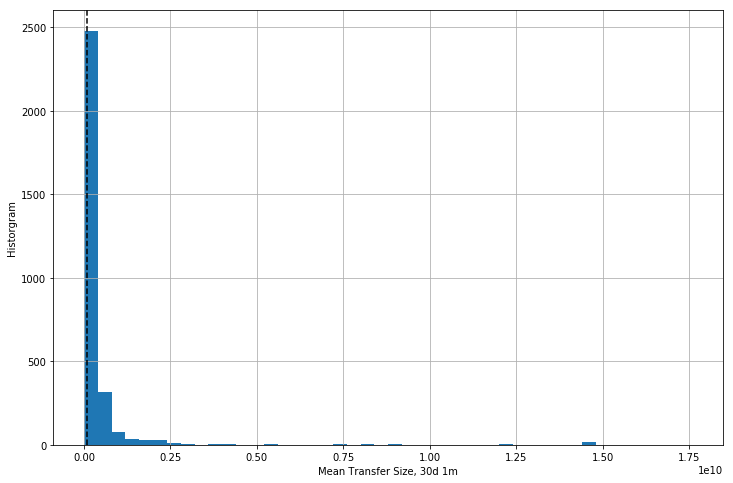

Points above the dotted line : 977
Total points in the dataset : 3024


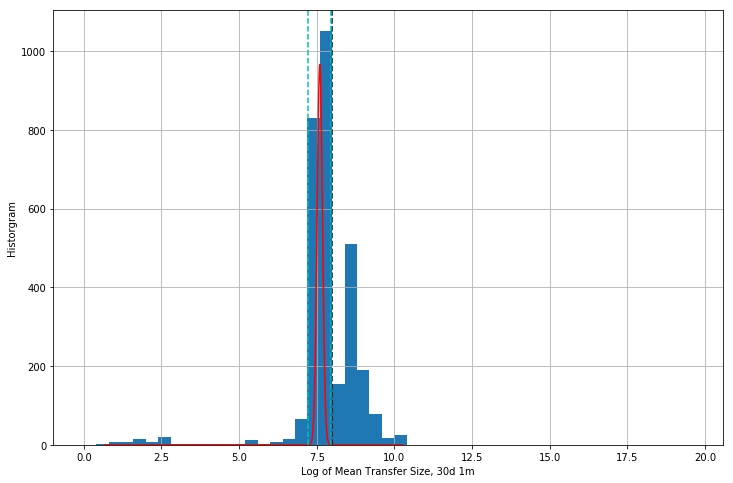

Points above the dotted line : 977
Total points in the dataset : 3024
[7.59994355e+00 9.66114594e+02 1.21840788e-01]


In [7]:
plot_hist(8, data_mts[2], np.arange(1, 18000000000, 400000000), 'Mean Transfer Size, 30d 1m') 

In [8]:
# plot_hist(1.5, data_mtts[0], np.arange(0, 400, 20), 'Mean Transfer Time, 7d 1m') 

In [9]:
# plot_hist(1.5, data_mtts[1], np.arange(0, 400, 20), 'Mean Transfer Time, 7d 10s')

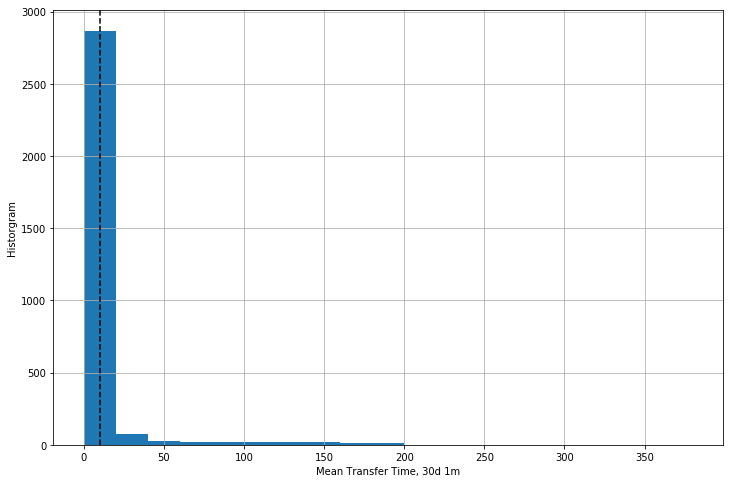

Points above the dotted line : 310
Total points in the dataset : 3092


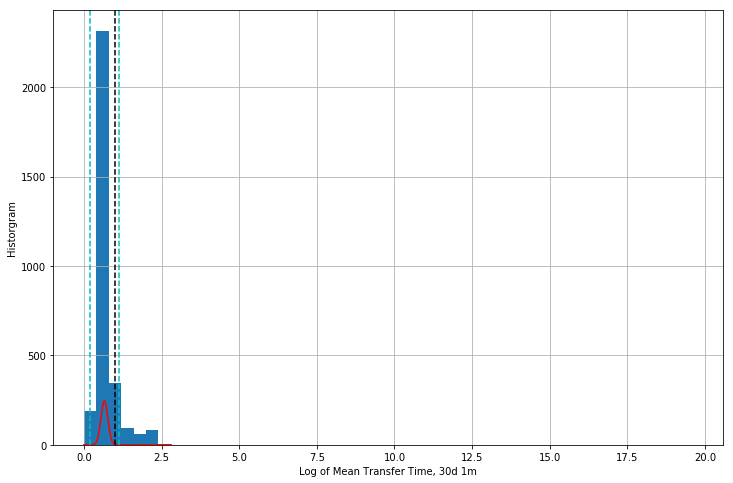

Points above the dotted line : 310
Total points in the dataset : 3092
[6.60614281e-01 2.45049300e+02 1.58349470e-01]


In [10]:
plot_hist(1, data_mtts[2], np.arange(0, 400, 20), 'Mean Transfer Time, 30d 1m') 